In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset=pd.read_csv('mumbai_bandra_Nan.csv')
dataset.head()
shape=dataset.shape
print(shape)

(412, 5)


In [3]:
dataset.isnull().sum()

Temp    45
RH      45
WS      45
WD      45
SR      56
dtype: int64

In [4]:
y=dataset.iloc[:,0:1].values
y

array([[30.63],
       [30.32],
       [29.14],
       [28.62],
       [28.42],
       [28.81],
       [30.01],
       [30.18],
       [30.68],
       [30.57],
       [30.27],
       [29.55],
       [29.07],
       [28.48],
       [28.25],
       [28.55],
       [27.92],
       [28.28],
       [28.49],
       [29.22],
       [29.1 ],
       [29.88],
       [  nan],
       [31.5 ],
       [29.48],
       [29.05],
       [28.2 ],
       [28.09],
       [27.98],
       [28.57],
       [28.49],
       [29.27],
       [29.79],
       [27.38],
       [27.29],
       [26.69],
       [25.44],
       [26.54],
       [26.91],
       [29.12],
       [27.65],
       [28.34],
       [27.56],
       [27.33],
       [26.31],
       [25.81],
       [28.56],
       [27.84],
       [28.46],
       [27.2 ],
       [24.81],
       [23.97],
       [24.72],
       [27.01],
       [27.91],
       [26.85],
       [25.44],
       [25.63],
       [25.59],
       [25.42],
       [26.55],
       [27.01],
       [

In [5]:
x=dataset.iloc[:,1:].values
x

array([[5.7080e+01, 3.6000e-01, 1.9240e+02, 1.2621e+02],
       [5.4630e+01, 2.4000e-01, 1.7527e+02, 1.2208e+02],
       [5.5540e+01, 1.3000e-01, 1.6514e+02, 1.3191e+02],
       ...,
       [7.6280e+01, 1.0000e-01, 2.1740e+01, 6.6460e+01],
       [7.5170e+01, 1.0000e-01, 3.1340e+01, 3.9680e+01],
       [8.3080e+01, 1.0000e-01, 4.9420e+01, 4.4370e+01]])

In [6]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.NaN,strategy='mean')
imputer=imputer.fit(x[:,:])
x[:,:]=imputer.transform(x[:,:])
print(x)

[[5.7080e+01 3.6000e-01 1.9240e+02 1.2621e+02]
 [5.4630e+01 2.4000e-01 1.7527e+02 1.2208e+02]
 [5.5540e+01 1.3000e-01 1.6514e+02 1.3191e+02]
 ...
 [7.6280e+01 1.0000e-01 2.1740e+01 6.6460e+01]
 [7.5170e+01 1.0000e-01 3.1340e+01 3.9680e+01]
 [8.3080e+01 1.0000e-01 4.9420e+01 4.4370e+01]]


In [7]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [8]:
X = scale.fit_transform(x)

In [9]:
print(X)

[[-1.6173783   0.53525123  1.16805391  0.0697121 ]
 [-1.80909078  0.13914193  0.94428418  0.00253885]
 [-1.73788329 -0.22395825  0.81195567  0.16242095]
 ...
 [-0.11497845 -0.32298558 -1.06128303 -0.90210434]
 [-0.20183594 -0.32298558 -0.93587792 -1.33767328]
 [ 0.4171215  -0.32298558 -0.69969832 -1.26139179]]


In [10]:
imputer=imputer.fit(y[:,:])
y[:,:]=imputer.transform(y[:,:])
y

array([[30.63      ],
       [30.32      ],
       [29.14      ],
       [28.62      ],
       [28.42      ],
       [28.81      ],
       [30.01      ],
       [30.18      ],
       [30.68      ],
       [30.57      ],
       [30.27      ],
       [29.55      ],
       [29.07      ],
       [28.48      ],
       [28.25      ],
       [28.55      ],
       [27.92      ],
       [28.28      ],
       [28.49      ],
       [29.22      ],
       [29.1       ],
       [29.88      ],
       [37.71354223],
       [31.5       ],
       [29.48      ],
       [29.05      ],
       [28.2       ],
       [28.09      ],
       [27.98      ],
       [28.57      ],
       [28.49      ],
       [29.27      ],
       [29.79      ],
       [27.38      ],
       [27.29      ],
       [26.69      ],
       [25.44      ],
       [26.54      ],
       [26.91      ],
       [29.12      ],
       [27.65      ],
       [28.34      ],
       [27.56      ],
       [27.33      ],
       [26.31      ],
       [25

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,train_size=0.9,random_state=0)

In [12]:
from sklearn import linear_model
reg=linear_model.LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [13]:
scaled = scale.transform([[54.63,0.24,175.27,122.08]])
print([scaled[0]])

[array([-1.80909078,  0.13914193,  0.94428418,  0.00253885])]


In [14]:
temp=reg.predict([scaled[0]])
print(temp)

[[34.76719264]]


In [15]:
x_true = scale.fit_transform(x_test)

In [16]:
y_pred=reg.predict(x_true)
print(y_pred)

[[49.78702919]
 [35.3812108 ]
 [34.80435385]
 [37.9028769 ]
 [38.29442138]
 [37.71187516]
 [36.14652476]
 [37.97059351]
 [36.54520187]
 [44.31458286]
 [40.54345785]
 [38.11941133]
 [34.16242873]
 [10.6369729 ]
 [40.49184718]
 [36.49548732]
 [40.63433989]
 [36.0712608 ]
 [37.11149764]
 [43.89724158]
 [35.44228246]
 [40.27710345]
 [32.80578234]
 [38.85984814]
 [35.9498519 ]
 [41.19139542]
 [43.02729106]
 [38.15468618]
 [37.98397152]
 [37.84332288]
 [37.68717233]
 [33.68529435]
 [34.80861925]
 [35.9234545 ]
 [38.65173567]
 [39.18513875]
 [42.75308664]
 [37.35092305]
 [35.30771336]
 [34.6934924 ]
 [38.62300884]
 [37.24229962]]


In [17]:
from sklearn.metrics import mean_absolute_error

In [18]:
mean_absolute_error(y_test, y_pred)

13.643899217164828

In [19]:
from sklearn.metrics import mean_squared_error

In [20]:
mean_squared_error(y_test, y_pred, squared=False)

16.06445705730579

In [21]:
mean_squared_error(y_test, y_pred)

258.0667805460218

In [22]:
from sklearn.metrics import mean_squared_log_error

In [23]:
mean_squared_log_error(y_test, y_pred)

0.32528062539571756

In [24]:
mean_squared_log_error(y_test, y_pred, squared=False)

0.5703337841963402

In [25]:
from sklearn.metrics import mean_squared_error

In [26]:
mean_squared_error(y_test, y_pred)

258.0667805460218

In [27]:
mean_squared_error(y_test, y_pred, squared=False)

16.06445705730579

In [28]:
from sklearn.metrics import median_absolute_error

In [29]:
median_absolute_error(y_test, y_pred)

12.117654231487707

In [30]:
from sklearn.metrics import r2_score

In [31]:
r2_score(y_test, y_pred)

-0.06403260080744033

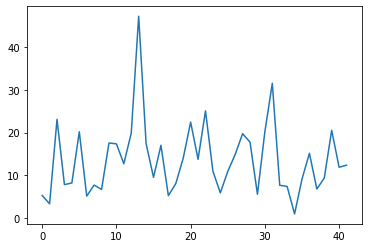

In [41]:
%matplotlib inline 
plt.plot(abs(y_test-y_pred))
plt.show()